In [18]:
import time
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from common import *

%matplotlib inline
import visualization as viz
viz.set_plot_style()

Links included in the evaluation, i.e. the first 32 links of 4A in the CCW direction:

In [3]:
links = ['1277:1102', '10427:1183', '2675:1188', '1188:1190', '1190:1192',
         '1192:1193', '29848:1254', '1254:1255', '10116:1258', '1258:1260',
         '1260:1261', '1261:1262', '1990:1268', '1268:1269', '1269:1270',
         '1270:1272', '1272:1273', '1273:1274', '1274:1275', '1275:1276',
         '1276:1277', '10017:1989', '1989:1990', '1193:2666', '1183:2673',
         '2673:2675', '7035:2757', '1262:7035', '2757:10017', '1255:10115',
         '10115:10116', '1102:10427']
len(links)

32

In [4]:
dates = pd.date_range('2017-10-10', '2017-10-14')

In [5]:
cms = []

for d in dates:
    cm = pd.read_csv('../data/current_model/estimated-link-travel-time_' + d.strftime('%Y%m%d') + '.csv', 
                     names = ['LogTime', 
                              'JourneyRef',
                              'JourneyLinkRef',
                              'VehicleRef', 
                              'LinkRef',
                              'EstimatedDepartureDateTime', 
                              'EstimatedArrivalDateTime',
                              'EstimatedLinkTravelTime', 
                              'EstimateAge'])

    cm['LogTime'] = pd.to_datetime(cm['LogTime'])
    cm['EstimatedDepartureDateTime'] = pd.to_datetime(cm['EstimatedDepartureDateTime'])
    cm['EstimatedArrivalDateTime'] = pd.to_datetime(cm['EstimatedArrivalDateTime'])
    cm = cm[cm['LinkRef'].isin(links)]
    
    cms.append(cm)

cm = pd.concat(cms)

In [89]:
cm

,LogTime,JourneyRef,JourneyLinkRef,VehicleRef,LinkRef,EstimatedDepartureDateTime,EstimatedArrivalDateTime,EstimatedLinkTravelTime,EstimateAge,Prediction
1,2017-10-10 00:15:05,20171009L0004J0196,20171009L0004J0196#036,3294,1193:2666,2017-10-10 00:17:48,2017-10-10 00:19:45,117,344.0,15min
2,2017-10-10 00:15:05,20171009L0004J0197,20171009L0004J0197#031,3275,2675:1188,2017-10-10 00:30:07,2017-10-10 00:31:22,75,21.0,30min
3,2017-10-10 00:15:05,20171009L0004J0197,20171009L0004J0197#028,3275,10427:1183,2017-10-10 00:26:14,2017-10-10 00:27:21,67,21.0,15min
4,2017-10-10 00:15:05,20171009L0004J0197,20171009L0004J0197#020,3275,1270:1272,2017-10-10 00:17:21,2017-10-10 00:18:00,39,21.0,15min
5,2017-10-10 00:15:05,20171009L0004J0197,20171009L0004J0197#023,3275,1274:1275,2017-10-10 00:20:51,2017-10-10 00:21:26,35,21.0,15min
6,2017-10-10 00:15:05,20171009L0004J0197,20171009L0004J0197#030,3275,2673:2675,2017-10-10 00:29:18,2017-10-10 00:30:02,44,578.0,15min
7,2017-10-10 00:15:05,20171009L0004J0197,20171009L0004J0197#024,3275,1275:1276,2017-10-10 00:21:28,2017-10-10 00:22:47,79,21.0,15min
8,2017-10-10 00:15:05,20171009L0004J0197,20171009L0004J0197#035,3275,1192:1193,2017-10-10 00:35:01,2017-10-10 00:35:44,43,21.0,30min
9,2017-10-10 00:15:05,20171009L0004J0197,20171009L0004J0197#032,3275,1188:1190,2017-10-10 00:31:05,2017-10-10 00:33:13,128,21.0,30min
12,2017-10-10 00:15:05,20171009L0004J0197,20171009L0004J0197#021,3275,1272:1273,2017-10-10 00:18:07,2017-10-10 00:19:07,60,21.0,15min


In [6]:
len(cm['LinkRef'].unique())

32

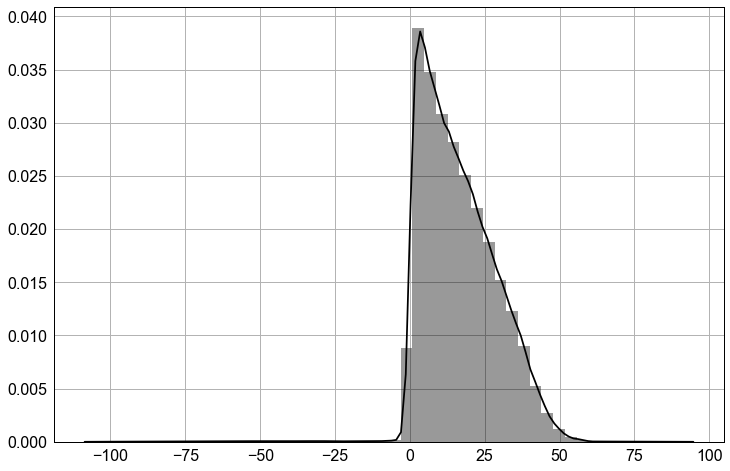

In [7]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.distplot((cm[cm['EstimatedDepartureDateTime'].notnull()]['EstimatedDepartureDateTime'] - cm[cm['EstimatedDepartureDateTime'].notnull()]['LogTime']) / np.timedelta64(1, 'm'))

In [8]:
diff = cm['EstimatedDepartureDateTime'] - cm['LogTime']
cm.loc[diff >= pd.to_timedelta('00:45:00'), 'Prediction'] = '45min+'
cm.loc[(pd.to_timedelta('00:30:00') <= diff) & (diff < pd.to_timedelta('00:45:00')), 'Prediction'] = '45min'
cm.loc[(pd.to_timedelta('00:15:00') <= diff) & (diff < pd.to_timedelta('00:30:00')), 'Prediction'] = '30min'
cm.loc[(pd.to_timedelta('00:00:00') <= diff) & (diff < pd.to_timedelta('00:15:00')), 'Prediction'] = '15min'
cm_15min = cm[cm['Prediction'] == '15min']

In [9]:
len(cm_15min['LinkRef'].unique())

32

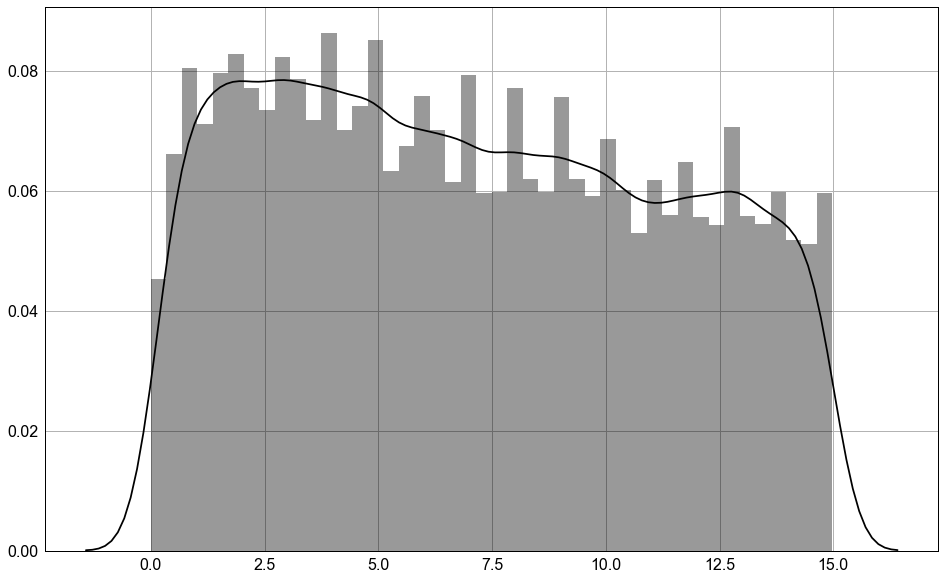

In [10]:
sns.distplot((cm_15min[cm_15min['EstimatedDepartureDateTime'].notnull()]['EstimatedDepartureDateTime'] - cm_15min[cm_15min['EstimatedDepartureDateTime'].notnull()]['LogTime']) / np.timedelta64(1, 'm'))

In [11]:
tss = {}
for link_ref, measures in cm_15min.groupby('LinkRef'):
    measures = measures.set_index('LogTime')
    tss[link_ref] = measures.resample('15min')['EstimatedLinkTravelTime'].mean() 

ts = pd.DataFrame(tss)

In [12]:
ts.shape

(479, 32)

In [13]:
ts_wo_missing = ts.interpolate().fillna(method = 'pad').fillna(method='bfill')

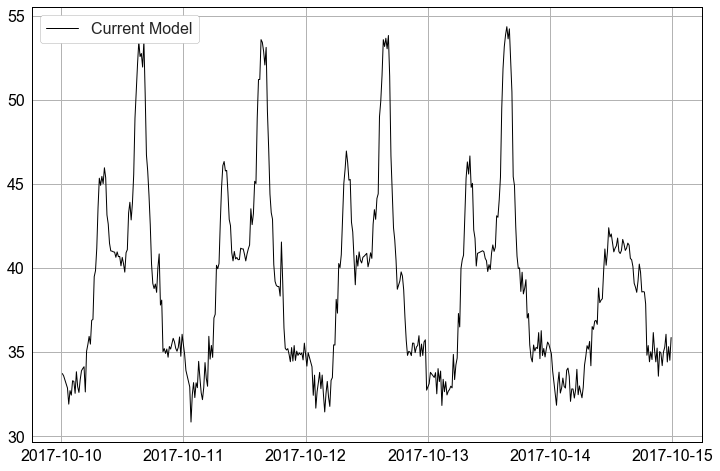

In [14]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(ts_wo_missing.sum(axis = 1) / 60, label = 'Current Model', linewidth = 1)
ax.legend(loc='upper left')

In [15]:
ts_wo_missing.to_csv('../data/current_model/data_prepared.csv')

In [40]:
time_steps = ['15min', '30min', '45min']

tss = {}
for t in time_steps:    
    temp = {}
    
    for link_ref, measures in cm[cm['Prediction'] == t].groupby('LinkRef'):
        measures = measures.set_index('LogTime')
        temp[link_ref] = measures.resample('15min')['EstimatedLinkTravelTime'].mean() 
    
    ts = pd.DataFrame(temp)
    ts_wo_missing = ts.interpolate().fillna(method = 'pad').fillna(method='bfill')
    
    tss[t] = ts_wo_missing.sum(axis = 1)

ts_cm_multistep = pd.DataFrame(tss)

In [19]:
data = prep_data('../data/4A_1_201705_201710.csv')
print(len(data))

1213677


In [67]:
data = data[(1 <= data['LineDirectionLinkOrder']) & (data['LineDirectionLinkOrder'] <= 32)]
assert len(data['LinkRef'].unique()) == 32
n = len(data)
print(n)

943136


In [68]:
data_train = data[data['DateTime'] < '2017-10-10']
data_test = data[('2017-10-11' <= data['DateTime']) & (data['DateTime'] < '2017-10-14')]

In [69]:
means, scales, low, upr = fit_scale(data_test)

In [70]:
ix, ts, rm_mean, rm_scale, w, k = transform(data_test, means, scales)

In [71]:
ts_true = pd.DataFrame(index = ix, data = ts * rm_scale + rm_mean, columns = k)

In [88]:
ts_true_multistep = pd.DataFrame(index = ts_true.index, data = ts_true.sum(axis = 1).values, columns = ['15min'])
ts_true_multistep['30min'] = ts_true_multistep['15min'].shift(-1)
ts_true_multistep['45min'] = ts_true_multistep['15min'].shift(-2)

In [73]:
ix_eval = ix[('2017-10-11' <= ix) & (ix <= '2017-10-14')]
ix_eval = ix_eval[ix_eval.indexer_between_time('06:00', '22:00')]
mask = ix.isin(ix_eval)
cm_mask = ts_cm_multistep.index.isin(ix_eval)

In [86]:
results = pd.DataFrame(columns = ['Model', 'Time ahead', 'RMSE (min)', 'MAE (min)', 'MAPE (%)', 'SMAPE (%)'])

Y_true_total_ = ts_true_multistep[mask].values / 60
Y_pred_total_ = ts_cm_multistep[cm_mask].values / 60

for t in range(len(time_steps)):
    rmse = np.sqrt(np.mean((Y_true_total_[:,t] - Y_pred_total_[:,t])**2))
    mae = np.mean(np.abs((Y_true_total_[:,t] - Y_pred_total_[:,t])))
    mape = np.mean(np.abs((Y_true_total_[:,t] - Y_pred_total_[:,t])) / Y_true_total_[:,t]) * 100
    smape = np.mean(np.abs((Y_true_total_[:,t] - Y_pred_total_[:,t])) / (np.abs(Y_true_total_[:,t]) + np.abs(Y_pred_total_[:,t])) / 2) * 100
    results = results.append(pd.DataFrame([['Current model', 't + ' + str(t+1) + ' (' + str(15+t*15) + ' min)', rmse, mae, mape, smape]], columns = results.columns), ignore_index = True)

results = results.set_index(['Model', 'Time ahead'])
results

RMSE (min)  MAE (min)  MAPE (%)  SMAPE (%)
Model         Time ahead                                                
Current model t + 1 (15 min)    4.917284   3.903671  8.047742   2.134504
              t + 2 (30 min)    4.908456   3.455649  6.820063   1.805286
              t + 3 (45 min)    5.468434   4.151679  8.683038   2.204066

In [87]:
print(results.to_latex())

\begin{tabular}{llrrrr}
\toprule
              &                &  RMSE (min) &  MAE (min) &  MAPE (\%) &  SMAPE (\%) \\
Model & Time ahead &             &            &           &            \\
\midrule
Current model & t + 1 (15 min) &    4.917284 &   3.903671 &  8.047742 &   2.134504 \\
              & t + 2 (30 min) &    4.908456 &   3.455649 &  6.820063 &   1.805286 \\
              & t + 3 (45 min) &    5.468434 &   4.151679 &  8.683038 &   2.204066 \\
\bottomrule
\end{tabular}

